<a href="https://colab.research.google.com/github/RioSatriatama/UTS-Machine-Learning-2023-2024/blob/main/UTS_Machine_Learning_2023_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIST TASK UTS MACHINE LEARNING
    1. Cek Tipe Data (DONE)
    2.  Pre Processing (DONE)
        a) pisahkan x dan y (done)
        b) Gunakan SimpleImpluter, cek dan isi missing value pake fungsi median (done)
        c) MinMaxScaler atau StandardScaler (ini ada fungsi bawaan) (done)
        d) tampilkan statistik deskripsi (done)
    3.  Klasifikasi Model (DONE)
        a) KNN/ Decision Tree, SVM (done)
        b) metode Holdout (80% train, 20% test) (done)
        c) confusion matrix (done)
    4. clustering model
        a) K-Means/ DBSCAN/ Agglomerative
        b) silhouette scoe

In [1]:
import pandas as pd #Method pandas
pd.set_option("display.max_columns", None) #menampilkan semua kolom

url = "https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv" #Url dataset

df = pd.read_csv(url) #membaca dataset dari url yang ada dalam bentuk csv
df.head(5) #menampilkan sample dari 5 teratas

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0,7.0,0.6,188.0,2,2,20,756,NaN,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0,1,53.0,0.7,136.0,3,6,905,1988,2631.0,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2,1,41.0,0.9,145.0,5,6,1263,1716,2603.0,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0,0,10.0,0.8,131.0,6,9,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13,1,44.0,0.6,141.0,2,14,1208,1212,1411.0,8,2,15,1,1,0,1


### Nomor 1. Cek Tipe Data
    untuk mengecek tipe data kategorik bisa dilakukan pencarian dengan menggunakan fungsi select_dtypes(include=['object']) parameter objek merupakan tipe data untuk jenis kategorik, fungsi info() digunakan untuk melihat seluruh tipe data. dari hasil yang diperoleh, tidak ditemukan atribut dengan tipe data kategorik.


In [2]:
categorical_columns = df.select_dtypes(
    include=["object"]
)  # cek atribut kategorik dengan menggunakan tipe data object
print(f"Atribut berjenis kategorik: {categorical_columns.columns} \n")
df.info()  # cek keseluruhan tipe data yang ada

Atribut berjenis kategorik: Index([], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1990 non-null   float64
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1990 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1990 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            1990 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 

### Nomor 2. Preprocessing

In [3]:
"""
a) Memisahkan atribut detektor dan atribut label
"""
# Memisahkan atribut dari label
X = df.drop("price_range", axis=1)  # X berisi atribut
y = df["price_range"]  # y berisi label

In [4]:
from sklearn.impute import SimpleImputer

"""
b) cek missing value dan isi dengan median menggunakan simpleimputer
"""
missing_value = X.isna().sum()
print(f"data yang memiliki missing value: \n{missing_value}")

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy="median")

# Pilih kolom-kolom yang memiliki nilai yang hilang (jika ada)
columns_with_missing_values = X.columns[X.isna().any()].tolist()

# Terapkan SimpleImputer ke kolom-kolom dengan nilai yang hilang
X[columns_with_missing_values] = imputer.fit_transform(X[columns_with_missing_values])

data yang memiliki missing value: 
battery_power    10
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory       10
m_dep             0
mobile_wt        10
n_cores           0
pc                0
px_height         0
px_width          0
ram              10
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

"""
c) Menggunakan MinMaxScaler untuk mengubah data detektor menjadi seragam
"""

# Inisialisasi MinMaxScaler
scaler = StandardScaler()

# Terapkan MinMaxScaler ke
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled

array([[-0.90270016, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49445888,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.53900921,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53534416, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62535381, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65988512,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [7]:
"""
d) Menampilkan deskripsi data sebelum dan setelah dilakukan handle missing value dan standarisasi
"""
originalData = df.describe() #menampilkan deskripsi statistik dari data original
print(f"Original Data: \n{originalData}")

Original Data: 
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.407114     2.287837   
min       0.000000   

In [8]:
# Menampilkan statistik deskriptif setelah pengolahan
processed_stats = pd.DataFrame(X_scaled, columns=X.columns).describe() #menampilkan deskripsi statistik dari data preprocessing

print(f"Processing Data: \n{processed_stats}")

Processing Data: 
       battery_power          blue   clock_speed      dual_sim            fc  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean    2.842171e-17 -1.243450e-17 -1.545430e-16  8.082424e-17  5.861978e-17   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.680411e+00 -9.900495e-01 -1.253064e+00 -1.019184e+00 -9.928904e-01   
25%    -8.804636e-01 -9.900495e-01 -1.007906e+00 -1.019184e+00 -7.624947e-01   
50%    -2.920066e-02 -9.900495e-01 -2.727384e-02  9.811771e-01 -3.017032e-01   
75%     8.579829e-01  1.010051e+00  8.307794e-01  9.811771e-01  6.198797e-01   
max     1.733763e+00  1.010051e+00  1.811412e+00  9.811771e-01  3.384628e+00   

             four_g    int_memory         m_dep     mobile_wt       n_cores  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.048051e-16  3.197442e-17 -1.030287e-16  8.881784e-17 -7.727152e-17   
std    1.000250e+00  1.0

### Nomor 3. Klasifikasi Model

In [9]:
"""
b) Split data menggunakan metode holdout
"""

from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan (80%) dan data pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# RS= [5,25, 30, 32, 37]

In [10]:
"""
a) Membangun Model
"""

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Inisialisasi dictionary untuk dijadikan sebuah dataframe
best_param_model = {
    "grid_search": {},
    "random_search": {}
}

#### Fine Tuning menggunakan teknik Grid Search

In [11]:
#parameter dari SVM untuk fine tuning Grid Search
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": [0.1, 1, 10],
}

svm = SVC() #memanggil model SVM dengan method SVC
grid_search_svm = GridSearchCV(svm, param_grid, cv=5) #menggunakan teknik Grid Search
grid_search_svm.fit(X_train, y_train) #latih model

#Menambahkan kedalam dictionari ketika model telah mendapatkan parameter terbaik
best_param_model["grid_search"]["SVM"]= {"parameter":grid_search_svm.best_params_, "akurasi":grid_search_svm.best_score_}

In [12]:
#parameter dari KNN untuk fine tuning Grid Search
param_grid_knn = {
    "n_neighbors": [i for i in range(1, 100)],
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
}

knn = KNeighborsClassifier() #memanggil model KNN dengan method KNeighborsClassifier
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5) #menggunakan teknik Grid Search
grid_search_knn.fit(X_train, y_train)#latih model

#Menambahkan kedalam dictionari ketika model telah mendapatkan parameter terbaik
best_param_model["grid_search"]["KNN"]= {"parameter":grid_search_knn.best_params_, "akurasi":grid_search_knn.best_score_}

In [13]:
#parameter dari KNN untuk fine tuning Grid Search
param_grid_dt = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

dt = DecisionTreeClassifier() #memanggil model Decision Tree dengan method DecisionTreeClassifier
grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=5)#menggunakan teknik Grid Search
grid_search_dt.fit(X_train, y_train) #latih model

#Menambahkan kedalam dictionari ketika model telah mendapatkan parameter terbaik
best_param_model["grid_search"]["DECISION"]= {"parameter":grid_search_dt.best_params_, "akurasi":grid_search_dt.best_score_}

#### Fine Tuning menggunakan teknik Random Search

In [14]:
#parameter dari SVM untuk fine tuning Random Search
param_space = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": [0.1, 1, 10, 100],
}

svm = SVC() #memanggil model
random_search_svm = RandomizedSearchCV(
    svm, param_distributions=param_space, n_iter=100, cv=5, random_state=42
) #menggunakan teknik random search dengan pengulangan sebanyak 100
random_search_svm.fit(X_train, y_train) #latih model

#menambahkan ke dalam best_param_model
best_param_model["random_search"]["SVM"]= {"parameter":random_search_svm.best_params_, "akurasi":random_search_svm.best_score_}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [15]:
#parameter knn untuk random search
param_space_knn = {
    "n_neighbors": [i for i in range(1, 100)],
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
}

knn = KNeighborsClassifier() #memanggil model
random_search_knn = RandomizedSearchCV(
    knn, param_distributions=param_space_knn, n_iter=100, cv=5, random_state=42
) #menggunakan teknik random search
random_search_knn.fit(X_train, y_train) #latih model

#menambahkan data
best_param_model["random_search"]["KNN"]= {"parameter":random_search_knn.best_params_, "akurasi":random_search_knn.best_score_}

In [16]:
param_space_dt = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

dt = DecisionTreeClassifier()
random_search_dt = RandomizedSearchCV(
    dt, param_distributions=param_space_dt, n_iter=100, cv=5, random_state=42
)
random_search_dt.fit(X_train, y_train)

best_param_model["random_search"]["DECISION"]= {"parameter":random_search_dt.best_params_, "akurasi":random_search_dt.best_score_}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [17]:
df_grid = pd.DataFrame(best_param_model["grid_search"])#membuat dataframe baru dari data random_search
df_grid = df_grid.transpose() #transpose untuk mengubah kolom menjadi baris dan sebaliknya
df_grid["fine_tuned"]="grid_search" #Menambahkan data dengan nama kolom fine tuned untuk menandakan bahwa dataframe didapat dari fine tuning dengan metode grid search
df_grid

,parameter,akurasi,fine_tuned
SVM,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.9525,grid_search
KNN,"{'metric': 'manhattan', 'n_neighbors': 86, 'we...",0.71,grid_search
DECISION,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.84125,grid_search


In [18]:
df_random = pd.DataFrame(best_param_model["random_search"]) #membuat dataframe baru dari data random_search
df_random = df_random.transpose() #transpose untuk mengubah kolom menjadi baris dan sebaliknya
df_random["fine_tuned"]="random_search" #Menambahkan data dengan nama kolom fine tuned untuk menandakan bahwa dataframe didapat dari fine tuning dengan metode random search
df_random

,parameter,akurasi,fine_tuned
SVM,"{'kernel': 'linear', 'gamma': 0.1, 'C': 100}",0.955625,random_search
KNN,"{'weights': 'distance', 'n_neighbors': 85, 'me...",0.705,random_search
DECISION,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.84,random_search


In [19]:
df_concat = pd.concat([df_random, df_grid]).reset_index() #Menggabungkan dataframe dari random_search dan grid_search

# Melakukan sort sesuai dengan akurasi dan menggunakan parameter ascending untuk mengurutkan dari terbesar ke terkecil
df_concat.sort_values(by="akurasi", ascending=False, inplace=True)

df_concat.rename(columns={'index': 'model'}, inplace=True) #Rename column index dengan model

df_concat = df_concat.reset_index(drop=True)#Dengan mengatur drop=True, dapat menghapus indeks lama dan menggantinya dengan indeks default yang berurutan.

Kesimpulan: Hasil perbandingan dari ketiga model diperoleh bahwa model SVM dengan melakukan fine tuning memperoleh hasil tertinggi dengan akurasi 0.95 atau 95%. Hasil tersebut membuktikan bahwa Model SVM dengan menggunakan fine tuning random_search memberikan parameter terbaik untuk studi kasus yang ada

In [20]:
# Cek model terbaik dengan menggunakan loc[0] yang berarti baris pertama (index 0)
df_concat.loc[0]

model                                                  SVM
parameter     {'kernel': 'linear', 'gamma': 0.1, 'C': 100}
akurasi                                           0.955625
fine_tuned                                   random_search
Name: 0, dtype: object

Akurasi model SVM: 96.50% 



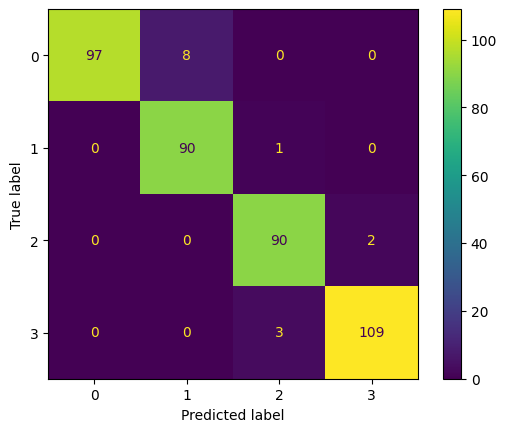

In [21]:
"""
c) Menampilkan Confusion Matrix
"""

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

#Memperoleh parameter terbaik dari beberapa model yang ada
best_parameter = df_concat.loc[0]["parameter"]

# Buat model SVM dengan parameter terbaik dari hasil fine-tuning
best_svm = SVC(kernel= best_parameter["kernel"], C= best_parameter["C"], gamma= best_parameter["gamma"])

# Latih model SVM dengan data pelatihan
best_svm.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = best_svm.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model {df_concat.loc[0]['model']}: {accuracy * 100:.2f}% \n")

# Menampilkan Confusion Metriks
confusion_mat = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat)

cm_display.plot()
plt.show()

### Nomor 4.

a. Gunakan salah satu algoritma berikut untuk melakukan *clustering* : K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

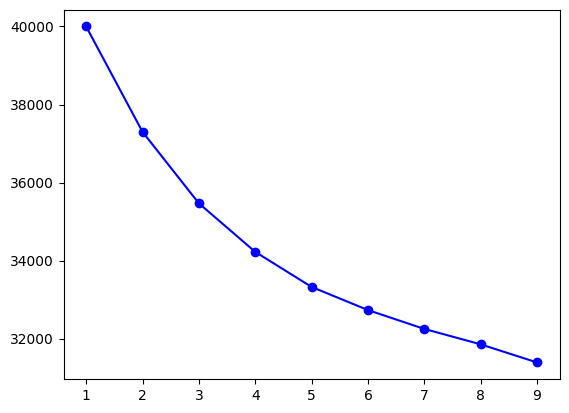

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# membuat list yang berisi inertia
elbow = []
for i in range(1,10):
  km = KMeans(n_clusters=i).fit(X_scaled) #melatih model KMeans dengan melakukan iterasi sebanyak i
  elbow.append(km.inertia_) #Mendapatkan Inertia

plt.plot(range(1,10),elbow,'bo-')

b. Tampilkan *silhouette* score dari model *clustering*

In [23]:
# membuat objek KMeans
kmeans = KMeans(n_clusters=2) #parameter 2 didapatkan dari elbow yang terlalu menyiku
kmeans.fit(X) #Latih model klastering

# menambahkan kolom label pada dataset
X['Labels'] = kmeans.labels_

km = silhouette_score(X,kmeans.labels_) #menampilkan silhouetter score
print(f"Silhouette Score: {km}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.39834236375683063


In [24]:
## Untuk Menampilkan Clustering

# import seaborn as sns

# for i in X.iloc[:, :-1]:
#     # membuat plot KMeans dengan 5 klaster
#     plt.figure(figsize=(8,4))
#     sns.scatterplot(x=i, y='Labels', data=X, hue='Labels' ,palette=sns.color_palette('hls', 5))
#     plt.title('KMeans dengan 5 Cluster')
#     plt.show()